# iGraph - Task 2

In [1]:
from igraph import Graph

from IPython import display
from igraph import plot
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import numpy as np

### Reading and displaying the graph

Reading data from the file by splitting each line into two nodes and add to de graph as undirected

In [2]:
edges = []
with open('edges.txt', 'r') as f:
    for e in f.readlines():
        v1, v2 = e.split(' ')
        edges.append((int(v1), int(v2)))
g = Graph(edges, directed=False)

Now let's extract the attributes of the graph, such as it's size, diameter and transitivity

In [3]:
directed = 'Directed' if g.is_directed() else 'Undirected'
num_vertices = len(g.vs)
num_edges = len(g.es)
diameter = g.diameter()
transitivity = g.transitivity_undirected()

print(f'The graph <V, E> is {directed}, with |V| = {num_vertices}, |E| = {num_edges},\
 d = {diameter} and transitivity = {transitivity}')

The graph <V, E> is Undirected, with |V| = 62, |E| = 602, d = 2 and transitivity = 0.5227690047741461


We encountered some problems while trying to display the degree distribution with the iGraph built-in function, so we will create our own histogram with Matplotlib and the degrees information:


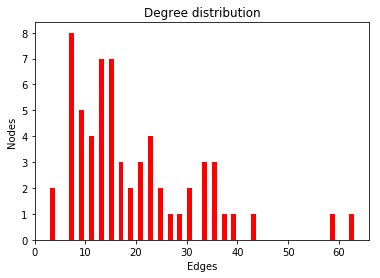

In [4]:
# Error plotting with iGraph: https://github.com/igraph/python-igraph/issues/88
# plot(g.degree_distribution())

h = g.degree()
plt.hist(h, bins=len(h), color='red')
plt.title('Degree distribution')
plt.xlabel('Edges')
plt.ylabel('Nodes')

plt.savefig('images/task2/hist_degree_distribution.png')

Let's take a look on how the graph looks:

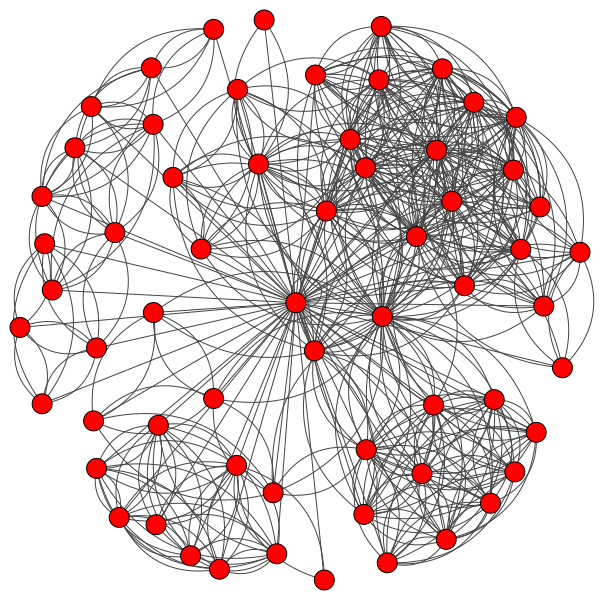

In [5]:
plot(g, layout = g.layout_kamada_kawai(),target='./images/task2/graph.png')
display.Image(filename='./graph.png')

It doesn't look like a random network as we can see well-defined and easily differentiable groups or clusters. There is a "central" node connected with most of the others.

Let's now check it better scaling the node sizes to its pagerank, by scaling the data and printing the pagerank corresponding to each node:

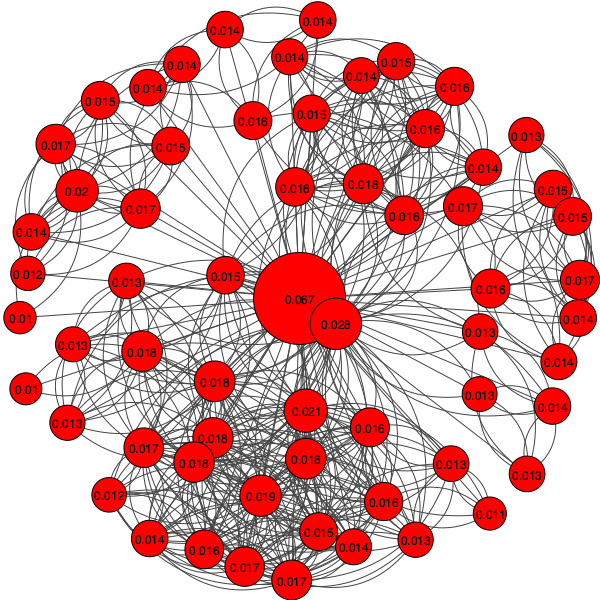

In [6]:
min_size = 32
max_size = 92
lab_size = 12
dec_size = 3

sc = MinMaxScaler(feature_range=(min_size, max_size))

pr = g.pagerank()
sc_pr = sc.fit_transform(np.array(pr).reshape(-1, 1))

g.vs['label_size'] = lab_size
for i in range(g.vcount()):
    g.vs[i]['size'] = sc_pr[i]
    g.vs[i]['label'] = round(pr[i], dec_size)

r = plot(g, layout = g.layout_kamada_kawai(),target='./images/task2/graph_pagerank.png')
display.Image(filename='./images/task2/pagerank.png')

### Community Detection

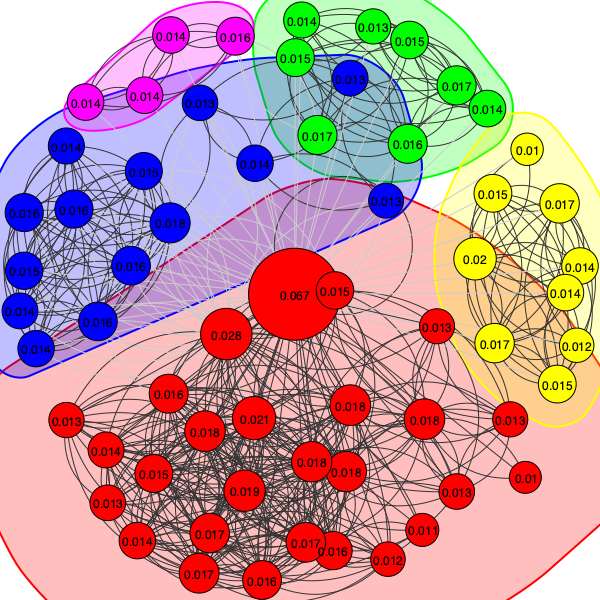

In [7]:
clust = g.community_label_propagation()
r = plot(clust,target='./images/task2/caimlab-clust.png', mark_groups=True)
display.Image(filename='./images/task2/caimlab-clust.png')

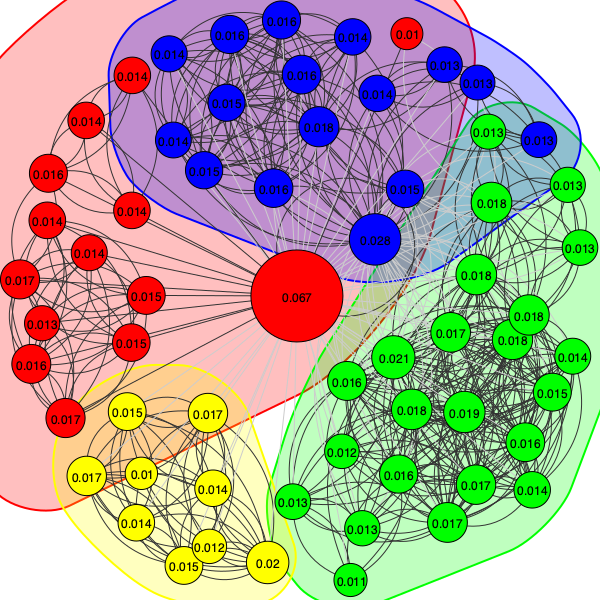

In [8]:
clust = g.community_leading_eigenvector()
r = plot(clust,target="./images/task2/caimlab-clust.png",mark_groups=True)
display.Image(filename="./images/task2/caimlab-clust.png")

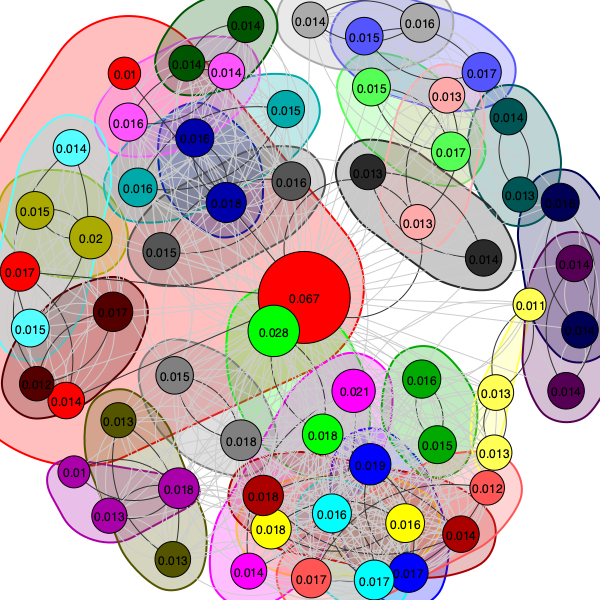

In [9]:
clust = g.community_infomap()
r = plot(clust,target="./images/task2/caimlab-clust.png",mark_groups=True)
display.Image(filename="./images/task2/caimlab-clust.png")

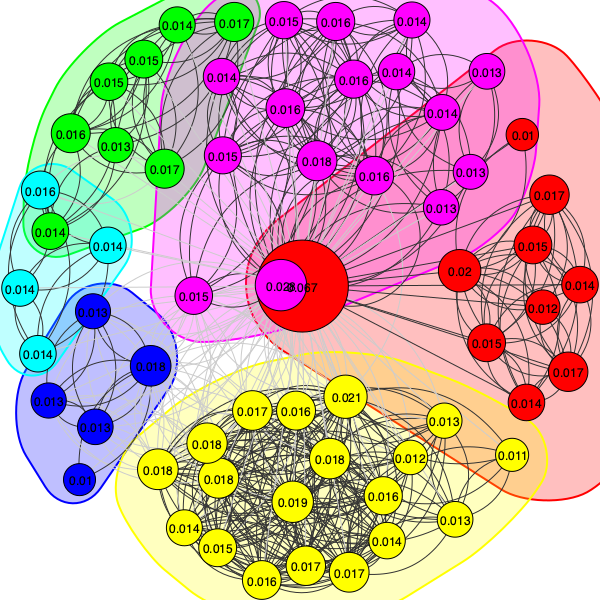

In [10]:
clust = g.community_multilevel()
r = plot(clust,target="./images/task2/caimlab-clust.png",mark_groups=True)
display.Image(filename="./images/task2/caimlab-clust.png")

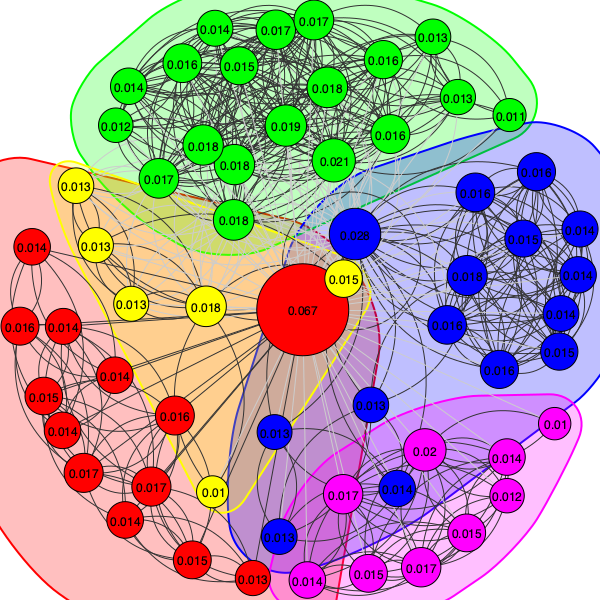

In [11]:
clust = g.community_optimal_modularity()
r = plot(clust,target="./images/task2/caimlab-clust.png", mark_groups=True)
display.Image(filename="./images/task2/caimlab-clust.png")